In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas


from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pandas.read_csv("cars.csv")
X = df[['Weight', 'Volume']]
y = df['CO2']

x1= df[['Weight']]
x2= df[['Volume']]

# print(X, "\n", y)

##Linear regression

intercept, (c or b0): 80.05939852445661
slope: (m or b1): [0.01699973]
coefficient of determination R^2: 0.3048696601951307
prediction of [1500, 190], using 1500= [105.55900043]


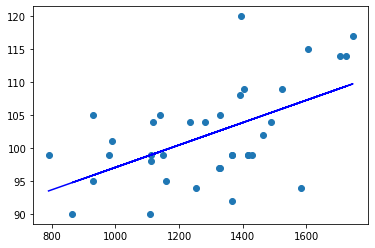

In [4]:
# X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1)) #or  .reshape((6,1))
# y = np.array([5, 20, 14, 32, 22, 38])
# print(x, "\n", y)

linear_reg = LinearRegression(fit_intercept=True, normalize=True)
linear_reg.fit(x1, y)
print('intercept, (c or b0):', linear_reg.intercept_)
print('slope: (m or b1):', linear_reg.coef_)
r_sqr_linear = linear_reg.score(x1, y)
print('coefficient of determination R^2:', r_sqr_linear)

y_pred = linear_reg.predict(x1)
# print('predicted response:', y_pred, sep='\n')

predictedCO2 = linear_reg.predict([[1500]])
print("prediction of [1500, 190], using 1500=", predictedCO2)


y_pred = linear_reg.intercept_ + linear_reg.coef_ * x1
# print('predicted response:', y_pred, sep='\n')


plt.subplot(1, 1, 1)
plt.scatter(x1, y)
plt.plot(x1, y_pred, color="blue")

# plt.subplot(2, 2, 2)
# plt.scatter(x, y)
# plt.plot(x, y_pred, color="black")

plt.show()

##Mulivariate regression

intercept, (c or b0): 79.69471929115939
slope: (m or b1) [0.00755095 0.00780526]
coefficient of determination R^2: 0.3765564043619989
prediction of [1500, 190]= [92.50413913]


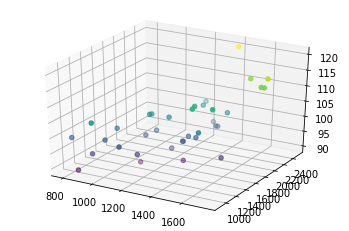

In [7]:
multvar_reg = LinearRegression(fit_intercept=True, normalize=True).fit(X, y)
print('intercept, (c or b0):', multvar_reg.intercept_)
print('slope: (m or b1)', multvar_reg.coef_)
r_sqr_multivar = multvar_reg.score(X, y)
print('coefficient of determination R^2:', r_sqr_multivar)

y_pred_multvar_reg = multvar_reg.predict(X)

predictedCO2 = multvar_reg.predict([[1500, 190]])
print("prediction of [1500, 190]=", predictedCO2)



fig1 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y, c=y)

###Transform input data

In [ ]:
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(X)
x_transformed = transformer.transform(X)
# print(x_transformed)

##Polynomial regression

In [ ]:
plynomial_reg =  LinearRegression(fit_intercept=True, normalize=True).fit(x_transformed, y)

r_sq_plynomial = plynomial_reg.score(x_transformed, y)
print('intercept:', plynomial_reg.intercept_)
print('coefficients:', plynomial_reg.coef_)
print('coefficient of determination R^2:', r_sq_plynomial)


predictedCO2 = [[1500, 190]]
print(predictedCO2 )
predictedCO2 = transformer.transform([[1500, 190]])
print(predictedCO2 )
predictedCO2 = plynomial_reg.predict( predictedCO2 )
print("prediction of [1500, 190]=", predictedCO2)

intercept: -3.470175536068126
coefficients: [-2.47975999e-01  4.44938503e-01  7.01641044e-04 -9.00034906e-04
  7.90528217e-05 -4.35414162e-07  6.55408637e-07 -2.48473732e-07
  5.08702063e-08]
coefficient of determination R^2: 0.6555618043622304
[[1500, 190]]
[[1.500e+03 1.900e+02 2.250e+06 2.850e+05 3.610e+04 3.375e+09 4.275e+08
  5.415e+07 6.859e+06]]
prediction of [1500, 190]= [-168.3011889]


##LASSO

In [ ]:
print("--LASSO (X 2D)--")
lasso_clf = Lasso(alpha=0.1 , fit_intercept=True, normalize=True)
lasso_clf.fit(X, y)

r_sq_lasso = lasso_clf.score(X, y)
print('intercept:', lasso_clf.intercept_)
print('coefficients:', lasso_clf.coef_)
print('coefficient of determination R^2:', r_sq_lasso)

predictedCO2 = [[1500, 190]]
print(predictedCO2 )
predictedCO2 = lasso_clf.predict( predictedCO2 )
print("prediction of [1500, 190]=", predictedCO2)

############################
print("\n\n--LASSO (transformed X)--")
lasso_clf = Lasso(alpha=0.1)
lasso_clf.fit(x_transformed, y)

r_sq_lasso = lasso_clf.score(x_transformed, y)
print('intercept:', lasso_clf.intercept_)
print('coefficients:', lasso_clf.coef_)
print('coefficient of determination R^2:', r_sq_lasso)

predictedCO2 = [[1500, 190]]
print(predictedCO2 )
predictedCO2 = transformer.transform([[1500, 190]])
print(predictedCO2 )
predictedCO2 = lasso_clf.predict( predictedCO2 )
print("prediction of [1500, 190]=", predictedCO2)

--LASSO (X 2D)--
intercept: 82.9836583985085
coefficients: [0.00611869 0.00691266]
coefficient of determination R^2: 0.3689578035966298
[[1500, 190]]
prediction of [1500, 190]= [93.47510621]


--LASSO (transformed X)--
intercept: 116.68969844472747
coefficients: [-2.29880758e-02  7.17161595e-03 -9.95956955e-06 -7.28934610e-06
 -2.66162264e-06  1.42438802e-08 -3.66791905e-10 -8.13225760e-10
  2.84883705e-09]
coefficient of determination R^2: 0.5544729348244736
[[1500, 190]]
[[1.500e+03 1.900e+02 2.250e+06 2.850e+05 3.610e+04 3.375e+09 4.275e+08
  5.415e+07 6.859e+06]]
prediction of [1500, 190]= [106.87940834]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.37751940045956, tolerance: 0.19449722222222224
  positive)


##RIDGE

In [ ]:
print("--RIDGE (X 2D)--")
ridge_clf = Ridge(alpha=0.1 , fit_intercept=True, normalize=True)
ridge_clf.fit(X, y)

r_sq_ridge = ridge_clf.score(X, y)
print('intercept:', ridge_clf.intercept_)
print('coefficients:', ridge_clf.coef_)
print('coefficient of determination R^2:', r_sq_ridge)

predictedCO2 = [[1500, 190]]
print(predictedCO2 )
predictedCO2 = ridge_clf.predict( predictedCO2 )
print("prediction of [1500, 190]=", predictedCO2)



print("\n\n--RIDGE (transformed X)--")
ridge_clf = Ridge(alpha=0.1)
ridge_clf.fit(x_transformed, y)

r_sq_ridge = ridge_clf.score(x_transformed, y)
print('intercept:', ridge_clf.intercept_)
print('coefficients:', ridge_clf.coef_)
print('coefficient of determination R^2:', r_sq_ridge)

predictedCO2 = [[1500, 190]]
print(predictedCO2 )
predictedCO2 = transformer.transform([[1500, 190]])
print(predictedCO2 )
predictedCO2 = ridge_clf.predict( predictedCO2 )
print("prediction of [1500, 190]=", predictedCO2)

--RIDGE (X 2D)--
intercept: 80.73020505101512
coefficients: [0.00772889 0.00701981]
coefficient of determination R^2: 0.37520028759966984
[[1500, 190]]
prediction of [1500, 190]= [93.65731094]


--RIDGE (transformed X)--
intercept: 116.68969844472747
coefficients: [-2.29880758e-02  7.17161595e-03 -9.95956955e-06 -7.28934610e-06
 -2.66162264e-06  1.42438802e-08 -3.66791905e-10 -8.13225760e-10
  2.84883705e-09]
coefficient of determination R^2: 0.5544729348244736
[[1500, 190]]
[[1.500e+03 1.900e+02 2.250e+06 2.850e+05 3.610e+04 3.375e+09 4.275e+08
  5.415e+07 6.859e+06]]
prediction of [1500, 190]= [106.87940834]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.37751940045956, tolerance: 0.19449722222222224
  positive)
